**Case study on Supervised Learning**

Dataset Description:
You are provided with a dataset (heart_disease.csv) containing the following columns:

age: Age of the individual

sex: Gender of the individual (0 = female, 1a= male)

chest pain type: Type of chest pain (4 categories: 0-3)

resting blood pressure: Resting blood pressure (in mm Hg)

serum cholesterol: Cholesterol level (in mg/dl)

fasting blood sugar: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)

resting electrocardiographic results: ECG results (0 = normal, 1 = ST-T abnormality, 2 = probable/definite left ventricular hypertrophy)

maximum heart rate achieved

exercise induced angina: Exercise-induced chest pain (1 = yes, 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: The slope of the peak exercise ST segment (0-2)

number of major vessels: Number of major vessels (0-3) colored by fluoroscopy

thal: Type of thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect)

target: Presence of heart disease (1 = Yes, 0 = No)


**Step 1: Load and Explore the Data**
Load the dataset into a Pandas DataFrame.
Perform exploratory data analysis (EDA):
Check for missing values, data types, and summary statistics.
Identify potential outliers in numerical columns.
Analyze the distribution of categorical variables.

**Load dataset**

In [1]:
import pandas as pd
file_path = 'heart_disease.csv'
df = pd.read_csv(file_path)

print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


**Check for missing value**

In [2]:
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**Examine datatype**

In [3]:

print(df.dtypes)


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


**Summary Statistics**

In [4]:
print(df.describe())


               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

**Identify potential outliers**

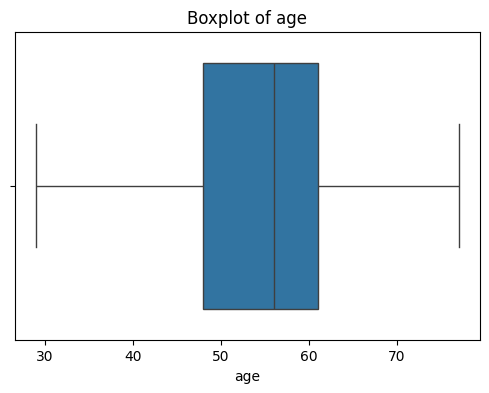

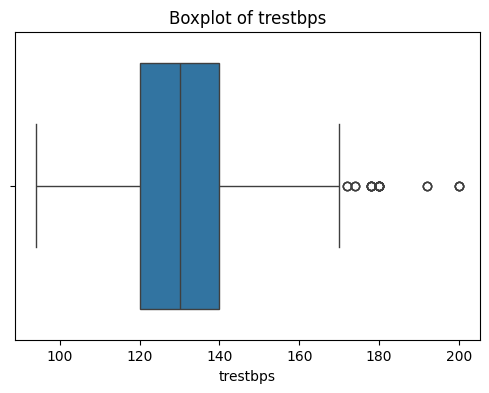

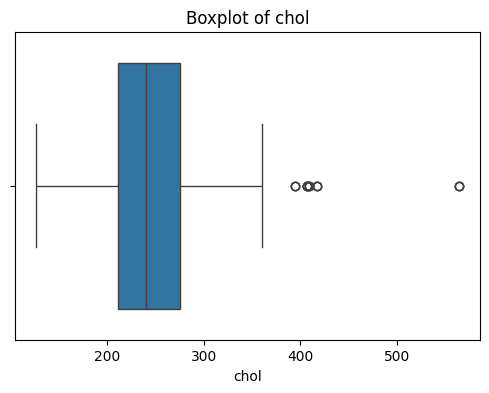

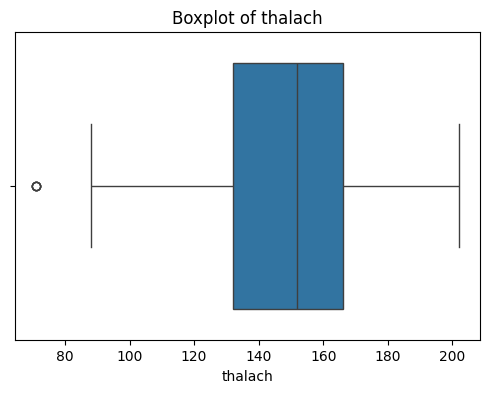

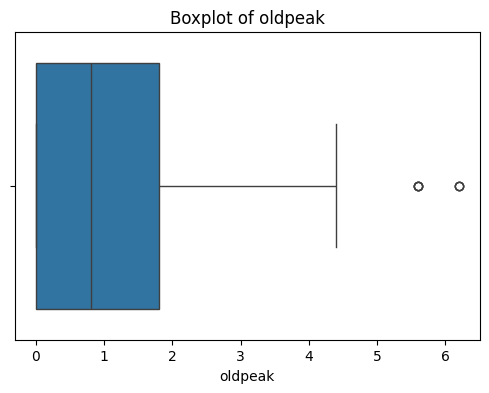

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']  

for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])  
    plt.title(f'Boxplot of {column}')
    plt.show()



**Analyze Categorical Variable Distributions**

In [13]:
print(df.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


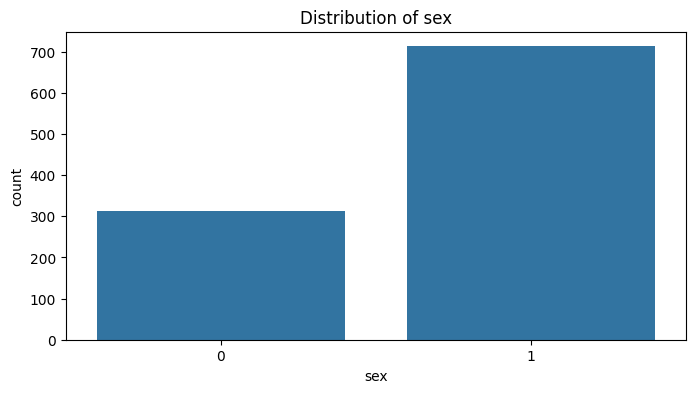

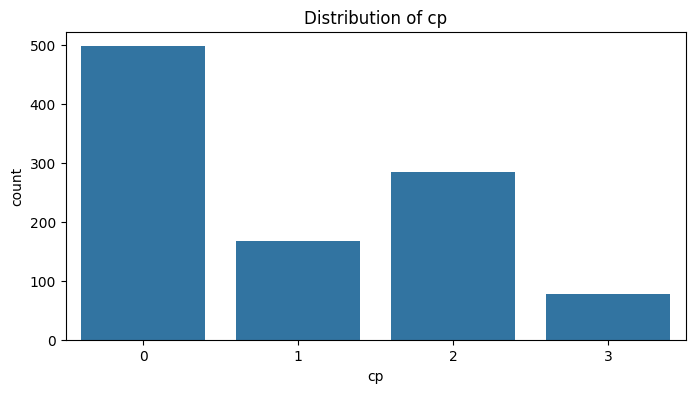

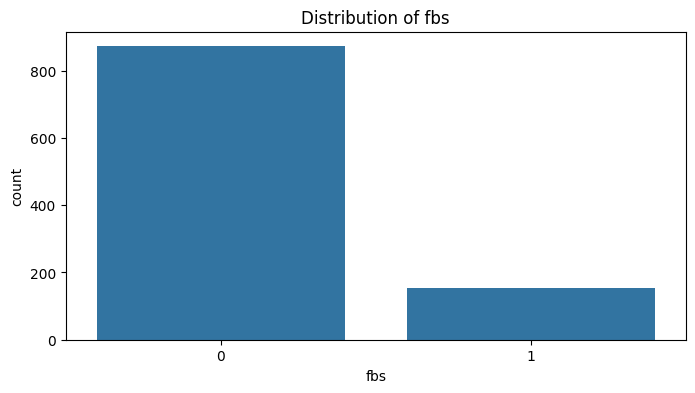

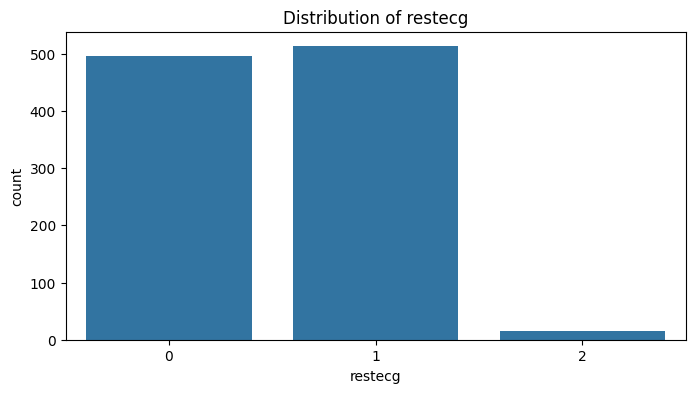

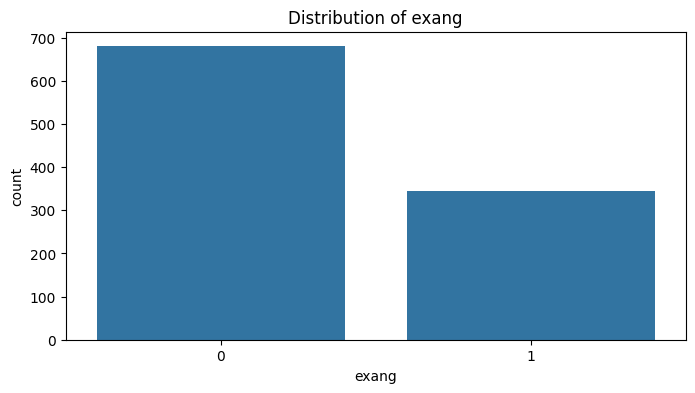

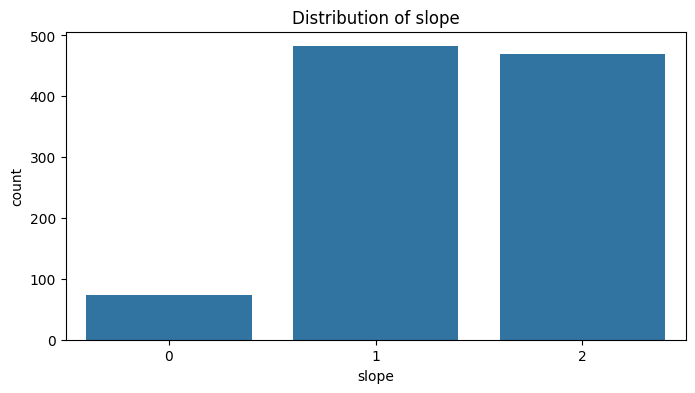

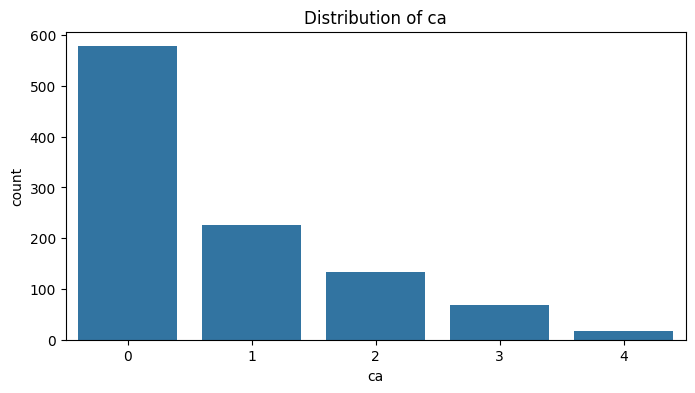

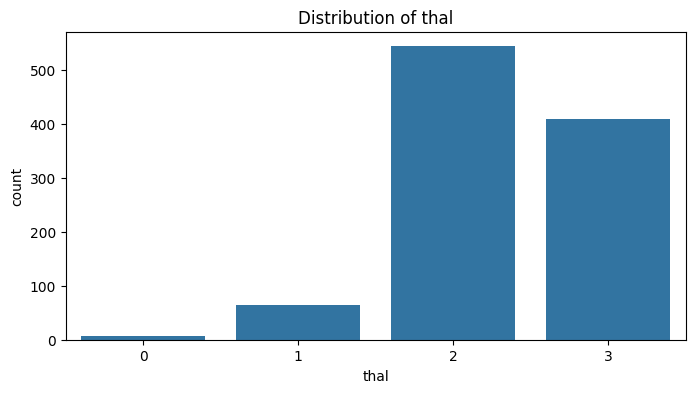

In [14]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()




**Step 2: Data Cleaning and Preprocessing**
Handle Missing Values (if needed):

Replace missing numerical values with the mean/median.
Replace missing categorical values with the mode.
Handle Outliers (if needed):

Use appropriate methods (e.g., IQR or z-score) to detect and handle outliers.
Encode Categorical Variables:

Use one-hot encoding for multi-category variables (chest pain type, resting electrocardiographic results, thal).
Use binary encoding for sex and fasting blood sugar.
Scale Numerical Features:

Scale features such as resting blood pressure, serum cholesterol, maximum heart rate, and oldpeak using StandardScaler or MinMaxScaler.

**Handle Missing Values**

In [33]:
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].mean()) 
categorical_columns = ['cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'thal_1', 'thal_2', 'thal_3', 'sex', 'fbs']

for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

**Handle outliers**

In [34]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


**Encode Categorical Variables**

In [35]:
df = pd.get_dummies(df, columns=['sex', 'fbs'], drop_first=True)  # Exclude already encoded columns


In [38]:
df['sex_1'] = df['sex_1'].map({0: 0, 1: 1})
df['fbs_1'] = df['fbs_1'].map({0: 0, 1: 1})


**Scale Numerical Features**

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_columns = ['trestbps', 'chol', 'thalach', 'oldpeak']
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])


**Step 3: Train-Test Split**
Split the data into training and testing sets:
For Regression: Predict serum cholesterol as the target variable.
For Classification: Predict target (presence of heart disease) as the target variable.


In [40]:
from sklearn.model_selection import train_test_split

# Regression
X_reg = df.drop(columns=['chol'])  
y_reg = df['chol']  

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Classification
X_class = df.drop(columns=['target']) 
y_class = df['target']  

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

print("Train-Test Split Completed!")


Train-Test Split Completed!


**Step 4: Build Machine Learning Models**
Regression Task:

Train a Linear Regression model to predict serum cholesterol.
Classification Task:

Train the following models to predict target:
Logistic Regression
K-Nearest Neighbors (KNN)
Naive Bayes

In [46]:
df = df.drop(columns=['sex_1', 'fbs_1'], errors='ignore')


In [47]:
imputer = SimpleImputer(strategy='most_frequent')
X_train_reg = imputer.fit_transform(X_train_reg)
X_test_reg = imputer.transform(X_test_reg)


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error

if 'chol' not in df.columns:
    raise ValueError("Column 'chol' is missing from the DataFrame.")

X_reg = df.drop(columns=['chol'])
y_reg = df['chol']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_reg = imputer.fit_transform(X_train_reg)
X_test_reg = imputer.transform(X_test_reg)

lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

y_pred_reg = lin_reg.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)

print(f"Linear Regression MAE: {mae:.4f}")
print(f"Linear Regression MSE: {mse:.4f}")



Linear Regression MAE: 0.8206
Linear Regression MSE: 1.0574


In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [52]:
print("Columns in dataset:", df.columns)

categorical_cols = ['sex_1', 'fbs_1']  
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

df = df.dropna(axis=1, how='all')

print("Remaining missing values:\n", df.isna().sum())


Columns in dataset: Index(['age', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
       'target', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')
Remaining missing values:
 age          0
trestbps     0
chol         0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
target       0
cp_1         0
cp_2         0
cp_3         0
restecg_1    0
restecg_2    0
thal_1       0
thal_2       0
thal_3       0
dtype: int64


In [53]:
X_reg = df.drop(columns=['chol'])
y_reg = df['chol']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

X_class = df.drop(columns=['target'])
y_class = df['target']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)


In [54]:
imputer = SimpleImputer(strategy='mean')

X_train_reg = imputer.fit_transform(X_train_reg)
X_test_reg = imputer.transform(X_test_reg)

X_train_class = imputer.fit_transform(X_train_class)
X_test_class = imputer.transform(X_test_class)

X_train_reg = pd.DataFrame(X_train_reg, columns=df.drop(columns=['chol']).columns)
X_test_reg = pd.DataFrame(X_test_reg, columns=df.drop(columns=['chol']).columns)
X_train_class = pd.DataFrame(X_train_class, columns=df.drop(columns=['target']).columns)
X_test_class = pd.DataFrame(X_test_class, columns=df.drop(columns=['target']).columns)


In [55]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

y_pred_reg = lin_reg.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)

print(f"Linear Regression MAE: {mae:.4f}")
print(f"Linear Regression MSE: {mse:.4f}")


Linear Regression MAE: 0.8206
Linear Regression MSE: 1.0574


In [56]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()

# Train models
log_reg.fit(X_train_class, y_train_class)
knn.fit(X_train_class, y_train_class)
nb.fit(X_train_class, y_train_class)

# Make predictions
y_pred_log = log_reg.predict(X_test_class)
y_pred_knn = knn.predict(X_test_class)
y_pred_nb = nb.predict(X_test_class)

# Evaluate Classification Models
log_accuracy = accuracy_score(y_test_class, y_pred_log)
knn_accuracy = accuracy_score(y_test_class, y_pred_knn)
nb_accuracy = accuracy_score(y_test_class, y_pred_nb)

print(f"Logistic Regression Accuracy: {log_accuracy:.4f}")
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")


C:\Users\sheni\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8098
KNN Accuracy: 0.8146
Naive Bayes Accuracy: 0.8098


**Step 5: Evaluate Models on Test Data**
For Regression:

Evaluate the Linear Regression model using:
Mean Absolute Error (MAE)
Mean Squared Error (MSE)
R-squared (R²)
For Classification:

Evaluate each classification model using:
Accuracy
Precision
Recall
F1-Score

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array([[1], [2], [3], [4], [5], [6]])  
y = np.array([1.2, 2.4, 3.1, 4.8, 5.9, 6.5])  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.11499999999999899
Mean Squared Error: 0.01444999999999977
R-squared: 0.9598611111111117


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

y_test = np.array([0, 1, 0, 1, 1]) 
y_pred = np.array([0, 1, 0, 0, 1])  
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.8
Precision: 0.8666666666666666
Recall: 0.8
F1-Score: 0.8
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5

